# Group 1 AEDA Capstone notebook

In [42]:
import numpy as np 
import pandas as pd 
import math 

import seaborn as sns 
import matplotlib.pyplot as plt

from statistics import mode
from scipy.special import binom
from scipy.stats import iqr

In [43]:
import warnings
warnings.filterwarnings('ignore')

## Q1

Load the given data and describe the dataset using variable type, data type, total column, total rows and other parameters.

First, we load the data file

In [44]:
test = pd.read_csv("../data/test.csv")
test

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [45]:
test.category.unique()

array(['B', 'F', 'D', 'G', 'A', 'E', 'H', 'C'], dtype=object)

Check for info

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8764 non-null   object
 1   views      8764 non-null   object
 2   likes      8764 non-null   object
 3   dislikes   8764 non-null   object
 4   comment    8764 non-null   object
 5   published  8764 non-null   object
 6   duration   8764 non-null   object
 7   category   8764 non-null   object
dtypes: object(8)
memory usage: 547.9+ KB


Checked csv files and found that there are 'F' values in some of the numerical datas

Data cleaning , removing irrelevant data, and change numerical data type to int64 data type

In [47]:
test=test[test.views!='F']
test=test[test.likes!='F']
test=test[test.dislikes!='F']
test=test[test.comment!='F']

In [48]:
test["views"]=pd.to_numeric(test["views"])
test["comment"]=pd.to_numeric(test["comment"])
test["likes"]=pd.to_numeric(test["likes"])
test["dislikes"]=pd.to_numeric(test["dislikes"])

In [107]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8549 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   vidid      8549 non-null   object  
 1   views      8549 non-null   int64   
 2   likes      8549 non-null   int64   
 3   dislikes   8549 non-null   int64   
 4   comment    8549 non-null   int64   
 5   published  8549 non-null   object  
 6   duration   8549 non-null   object  
 7   category   8549 non-null   category
dtypes: category(1), int64(4), object(3)
memory usage: 801.1+ KB


Changing 'category' variable to 'category' data type

In [108]:
test.category=test.category.astype('category')

In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8549 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   vidid      8549 non-null   object  
 1   views      8549 non-null   int64   
 2   likes      8549 non-null   int64   
 3   dislikes   8549 non-null   int64   
 4   comment    8549 non-null   int64   
 5   published  8549 non-null   object  
 6   duration   8549 non-null   object  
 7   category   8549 non-null   category
dtypes: category(1), int64(4), object(3)
memory usage: 801.1+ KB


In [110]:
test.describe(include=['object','category'])

,vidid,published,duration,category
count,8549,8549,8549,8549
unique,8549,2106,2274,8
top,VID_1054,2016-08-26,PT31S,D
freq,1,30,109,4335


In [111]:
test.describe()

,views,likes,dislikes,comment
count,8.549000e+03,8549.000000,8549.000000,8549.000000
mean,7.586353e+05,2923.643701,262.876126,472.864078
std,3.730342e+06,10012.249373,1052.373655,2115.437482
min,2.700000e+01,0.000000,0.000000,0.000000
25%,3.138000e+04,87.000000,7.000000,8.000000
50%,1.575880e+05,446.000000,38.000000,47.000000
75%,5.913440e+05,1900.000000,166.000000,229.000000
max,2.251478e+08,320072.000000,36023.000000,85250.000000


Checking for data types

In [112]:
test.dtypes

vidid          object
views           int64
likes           int64
dislikes        int64
comment         int64
published      object
duration       object
category     category
dtype: object

Checking for number of rows and columns 

In [55]:
test.shape

(8549, 8)

## Q2

Describe the categorical variables available in the dataset. Visualise the results based on your creativity.

Plotting bar charts to see counts of each category

<AxesSubplot:>

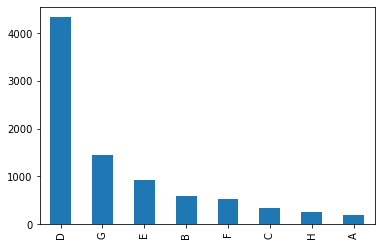

In [56]:
test.category.value_counts().plot.bar()

<AxesSubplot:xlabel='category', ylabel='count'>

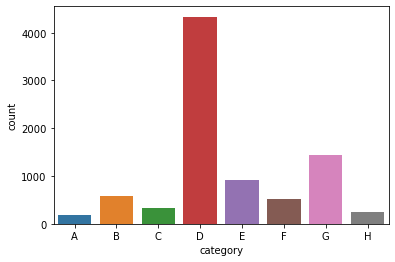

In [57]:
sns.countplot(x='category', data=test)

In [58]:
test.category.value_counts()

D    4335
G    1438
E     918
B     582
F     521
C     328
H     247
A     180
Name: category, dtype: int64

There are inbalance data count for each category 

## Q3

Present the distribution of each variable in the dataset. Interpret the results.

Create a sample because of the difference in datas for each category

Simple Random Sampling is used for sample1 to see if it is a suitable sampling method to use. Taking sample size of 1000.

In [59]:
sample1=test.sample(n=1000,replace=False)

In [60]:
print(f'Count of sample size:\n{sample1.category.value_counts()}')
print()
print(f'Percentage of sample size:\n{sample1.category.value_counts(normalize=True)*100}')
print()
print(f'Sample size: {sample1.category.value_counts().sum()}')

Count of sample size:
D    485
G    185
E    117
B     77
F     60
C     36
A     20
H     20
Name: category, dtype: int64

Percentage of sample size:
D    48.5
G    18.5
E    11.7
B     7.7
F     6.0
C     3.6
A     2.0
H     2.0
Name: category, dtype: float64

Sample size: 1000


Stratified Sampling is used for sample2 to see if it is a suitable sampling method to use. Taking 30% of each category as sample.

In [91]:
sample2= test.groupby("category").apply(lambda x: x.sample(frac = .3, random_state=42, replace = False))

In [92]:
print(f'Count of sample size:\n{sample2.category.value_counts()}')
print()
print(f'Percentage of sample size:\n{sample2.category.value_counts(normalize=True)*100}')
print()
print(f'Sample size: {sample2.category.value_counts().sum()}')

Count of sample size:
D    1300
G     431
E     275
B     175
F     156
C      98
H      74
A      54
Name: category, dtype: int64

Percentage of sample size:
D    50.721810
G    16.816231
E    10.729614
B     6.827936
F     6.086617
C     3.823644
H     2.887242
A     2.106906
Name: category, dtype: float64

Sample size: 2563


Plotting distribution plot of 'views' for each category

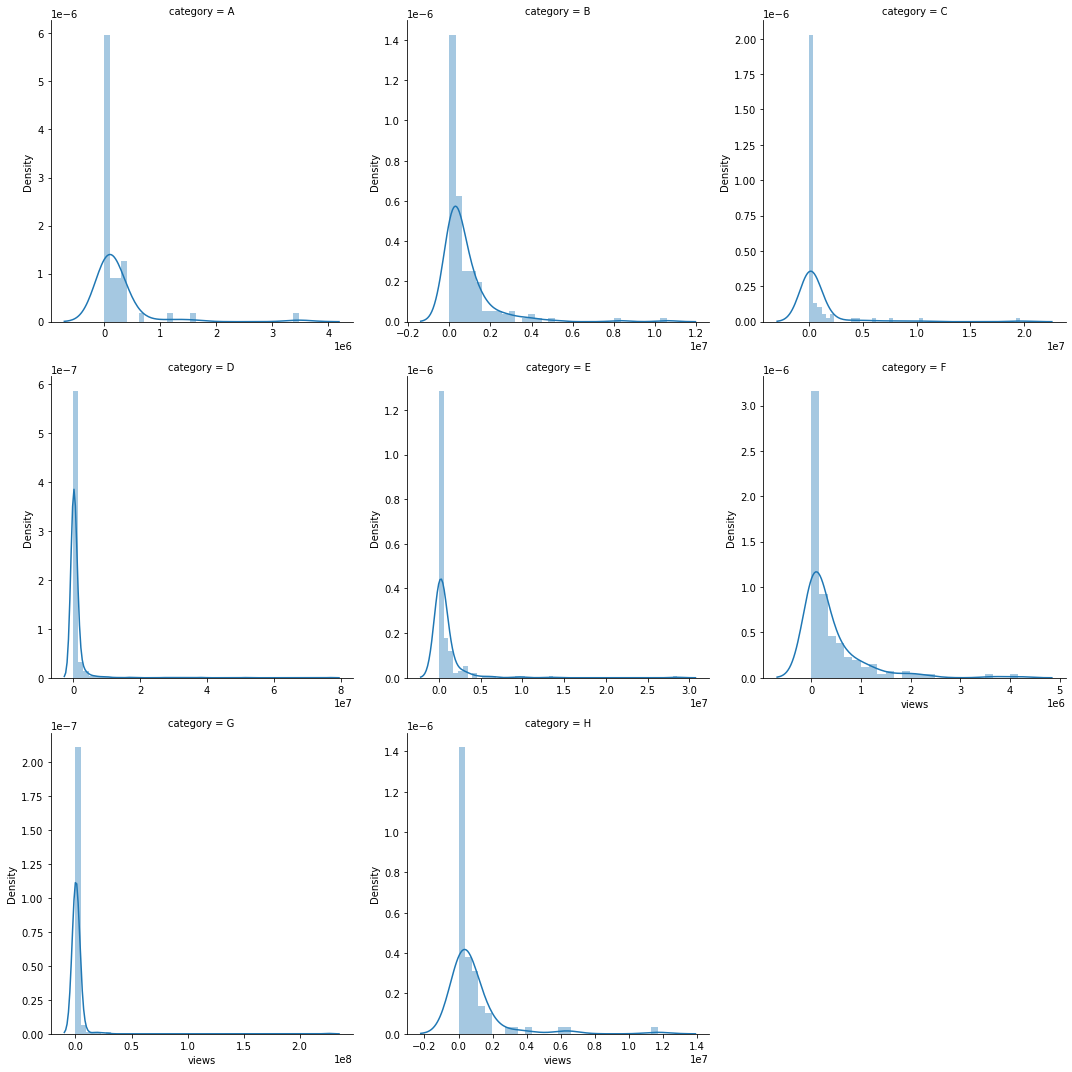

In [93]:
g=sns.FacetGrid(sample2, col='category' ,sharex = False, sharey = False,height=5, col_wrap=3)
g.map(sns.distplot, "views");

Plotting distribution plot of 'likes' for each category

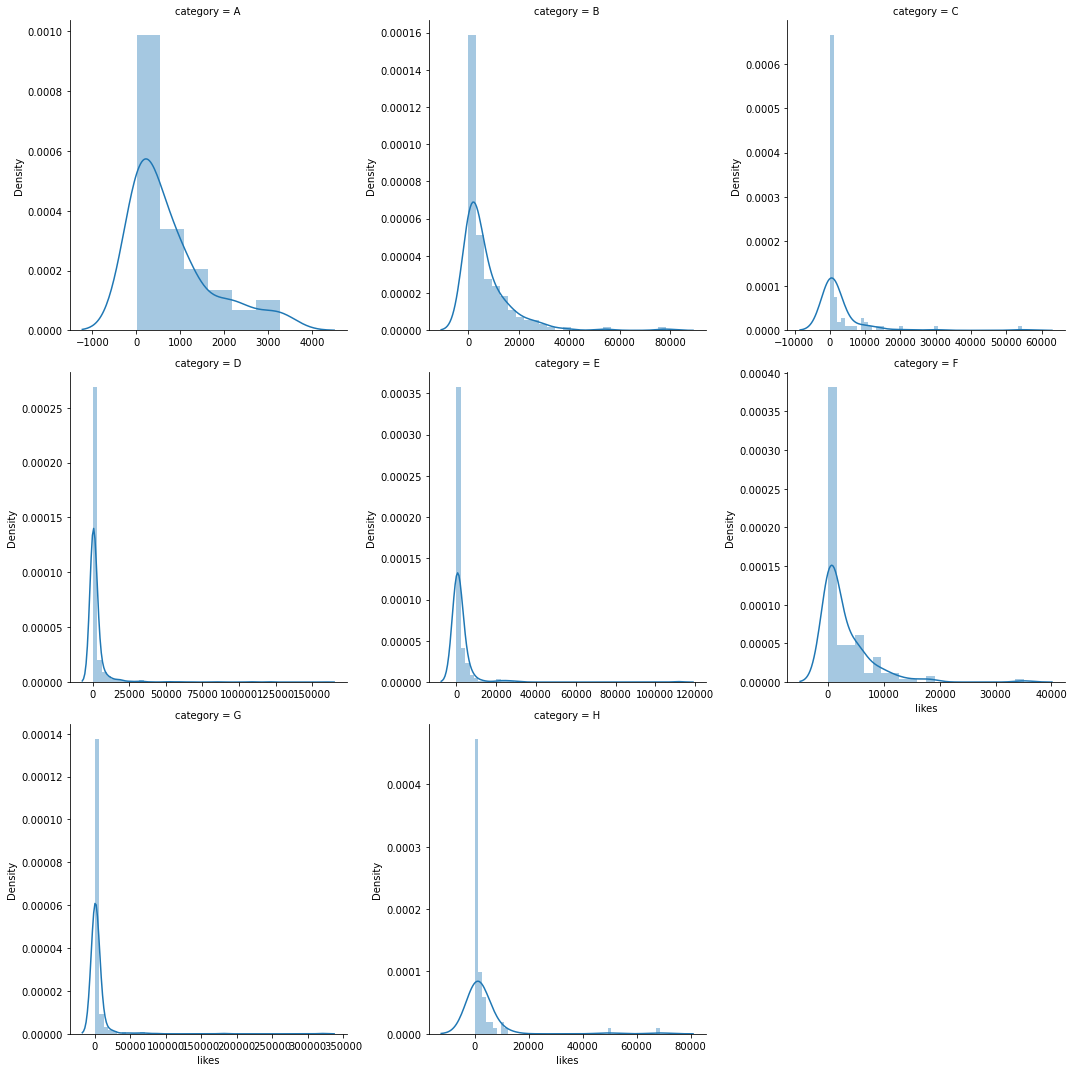

In [94]:
g=sns.FacetGrid(sample2, col='category' ,sharex = False, sharey = False,height=5, col_wrap=3)
g.map(sns.distplot, "likes");

Plotting distribution plot of 'dislikes' for each category

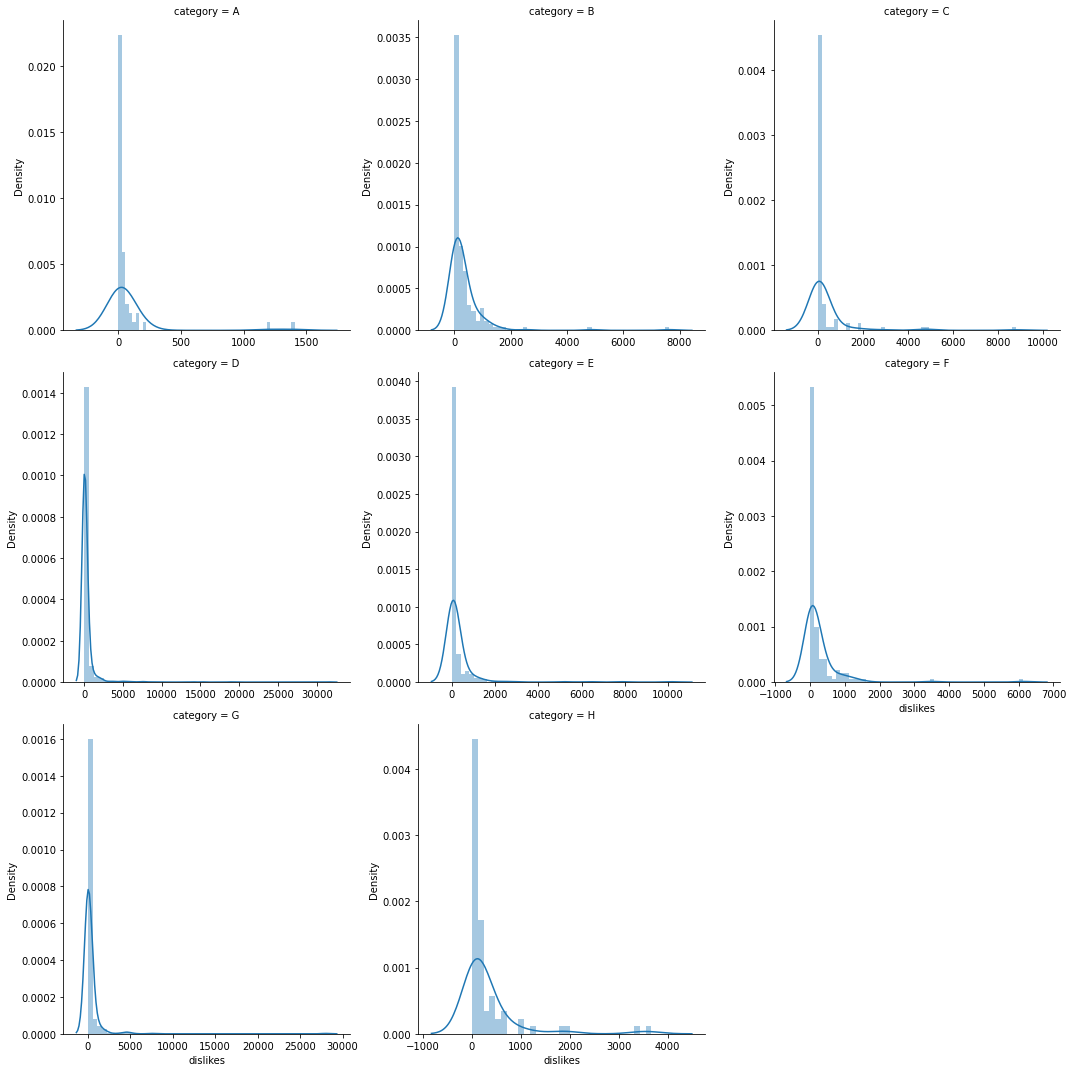

In [96]:
g=sns.FacetGrid(sample2, col='category' ,sharex = False, sharey = False,height=5, col_wrap=3)
g.map(sns.distplot, "dislikes");

Plotting distribution plot of 'comment' for each category

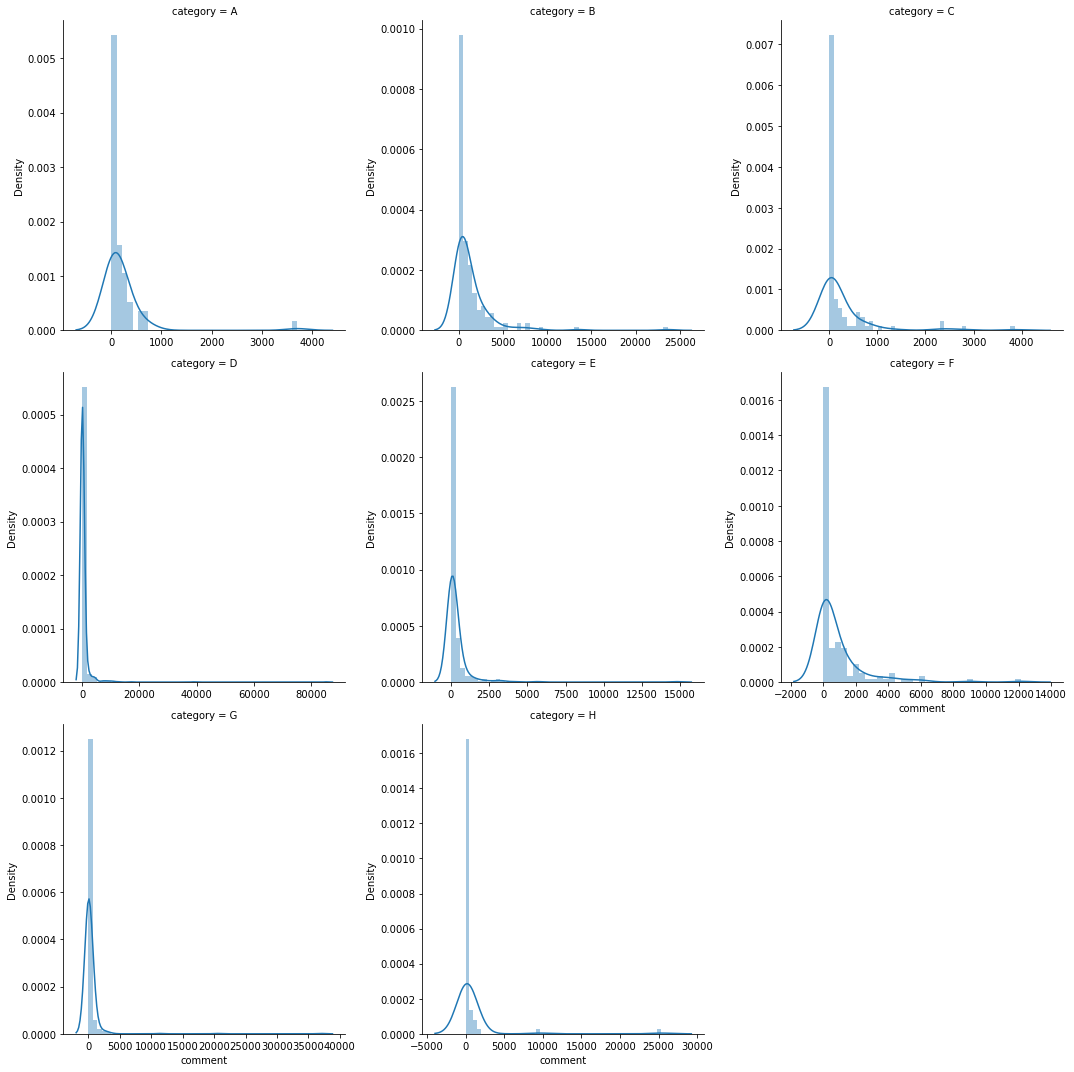

In [97]:
g=sns.FacetGrid(sample2, col='category' ,sharex = False, sharey = False,height=5, col_wrap=3)
g.map(sns.distplot, "comment");

In [67]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [98]:
# to know skewness for category column
# too high value because of the presence of many outliers
sample2.reset_index(inplace=True, drop=True)
sample2.groupby("category").agg(lambda x: skew(x, bias = False))

,views,likes,dislikes,comment
category,,,,
A,4.951205,1.445592,4.854574,6.101888
B,4.213555,3.336907,6.638198,5.231354
C,5.689865,5.166329,5.264014,3.838577
D,12.376465,9.196289,13.202568,21.652515
E,8.400159,10.739387,7.275339,9.594821
F,3.183273,3.241982,6.649861,3.636183
G,18.866763,12.083343,14.778150,13.981131
H,4.223310,5.637045,3.759695,7.248393


In [99]:
sample2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   vidid      2563 non-null   object  
 1   views      2563 non-null   int64   
 2   likes      2563 non-null   int64   
 3   dislikes   2563 non-null   int64   
 4   comment    2563 non-null   int64   
 5   published  2563 non-null   object  
 6   duration   2563 non-null   object  
 7   category   2563 non-null   category
dtypes: category(1), int64(4), object(3)
memory usage: 143.1+ KB


If a skewness value of greater than 1 is obtained in either direction (positive/negative), we say that the distribution is highly skewed. A skewness value of 0 represents a perfectly symmetric distribution, which in the case of real-world data is close to impossible to observe.

In [100]:
sample2.kurt(axis=0)

views       1207.305643
likes        269.951577
dislikes     269.861005
comment      590.115820
dtype: float64

As outliers are commonly seen in the tails, kurtosis can be used as a rough indicator of the presence of outliers - a higher kurtosis value indicates thicker tails, i.e. we are more likely to encounter outliers.

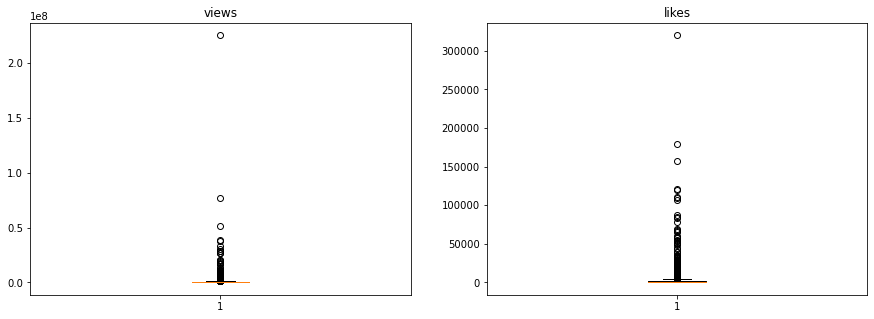

In [114]:
fg, ax = plt.subplots(ncols = 2, figsize=(15,5))

ax[0].boxplot(sample2['views'])
ax[0].set_title('views')
ax[1].boxplot(sample2['likes'])
ax[1].set_title('likes');

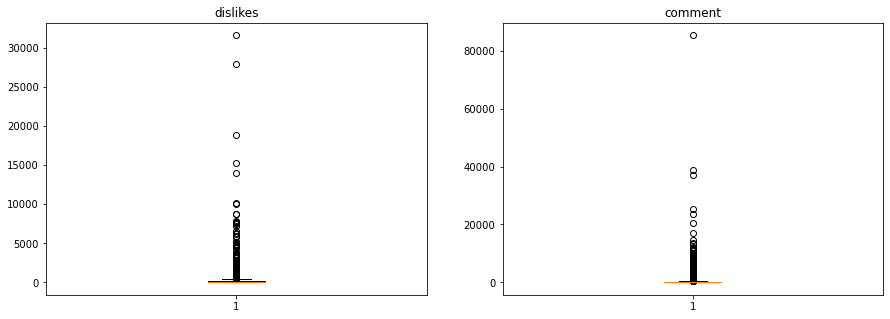

In [113]:
fg, ax = plt.subplots(ncols = 2, figsize=(15,5))

ax[0].boxplot(sample2['dislikes'])
ax[0].set_title('dislikes')
ax[1].boxplot(sample2['comment'])
ax[1].set_title('comment');

## Q4

Present the correlation between all the numeric variables. Explain the relationship between the variables using correlation values.

In [103]:
sample2.corr()

,views,likes,dislikes,comment
views,1.000000,0.788269,0.762099,0.289913
likes,0.788269,1.000000,0.782886,0.513387
dislikes,0.762099,0.782886,1.000000,0.420233
comment,0.289913,0.513387,0.420233,1.000000


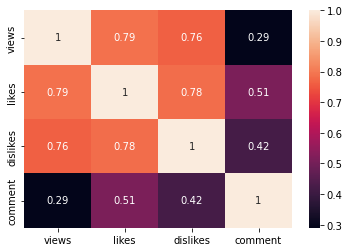

In [104]:
sns.heatmap(sample2.corr(), annot=True); 

## Q5

Calculate the measures of central tendancy and measures of dispersion for all the numerical variables.

In [106]:
from collections import Counter

sample2_views=sample2['views']
sample2_likes=sample2['likes']
sample2_dislikes=sample2['dislikes']
sample2_comment=sample2['comment']

views_mode=Counter(sample2['views']).most_common(10)
likes_mode=Counter(sample2['likes']).most_common(10)
dislikes_mode=Counter(sample2['dislikes']).most_common(10)
comment_mode=Counter(sample2['comment']).most_common(10)

print(f"""Central Tendancy and measures of dispersion for 'views'
Mean: {sample2.views.mean()}
Median: {sample2.views.median()}
Mode: {views_mode}
Range: {max(sample2_views) - min(sample2_views)}
First Quartile: {np.quantile(sample2_views,.25)}
Third Quartile: {np.quantile(sample2_views,.75)}
IQR: {iqr(sample2_views)}
Lower Fence: {np.quantile(sample2_views,.25) - 1.5 * iqr(sample2_views)}
Upper Fence: {np.quantile(sample2_views,.75) + 1.5 * iqr(sample2_views)}


Central Tendancy and measures of dispersion for 'likes'
Mean: {sample2.likes.mean()}
Median: {sample2.likes.median()}
Mode: {likes_mode}
Range: {max(sample2_likes) - min(sample2_likes)}
First Quartile: {np.quantile(sample2_likes,.25)}
Third Quartile: {np.quantile(sample2_likes,.75)}
IQR: {iqr(sample2_likes)}
Lower Fence: {np.quantile(sample2_likes,.25) - 1.5 * iqr(sample2_likes)}
Upper Fence: {np.quantile(sample2_likes,.75) + 1.5 * iqr(sample2_likes)}

Central Tendancy and measures of dispersion for 'dislikes'
Mean: {sample2.dislikes.mean()}
Median: {sample2.dislikes.median()}
Mode: {dislikes_mode}
Range: {max(sample2_dislikes) - min(sample2_dislikes)}
First Quartile: {np.quantile(sample2_dislikes,.25)}
Third Quartile: {np.quantile(sample2_dislikes,.75)}
IQR: {iqr(sample2_dislikes)}
Lower Fence: {np.quantile(sample2_dislikes,.25) - 1.5 * iqr(sample2_dislikes)}
Upper Fence: {np.quantile(sample2_dislikes,.75) + 1.5 * iqr(sample2_dislikes)}

Central Tendancy and measures of dispersion for 'comment'
Mean: {sample2.comment.mean()}
Median: {sample2.comment.median()}
Mode: {comment_mode}
Range: {max(sample2_comment) - min(sample2_comment)}
First Quartile: {np.quantile(sample2_comment,.25)}
Third Quartile: {np.quantile(sample2_comment,.75)}
IQR: {iqr(sample2_dislikes)}
Lower Fence: {np.quantile(sample2_comment,.25) - 1.5 * iqr(sample2_comment)}
Upper Fence: {np.quantile(sample2_comment,.75) + 1.5 * iqr(sample2_comment)}

Variance:\n{sample2.var()}

Standard Deviation:\n{sample2.std()}
""")

Central Tendancy and measures of dispersion for 'views'
Mean: 911410.9512290285
Median: 166024.0
Mode: [(36679, 3), (215530, 2), (1432, 2), (34683, 2), (171, 2), (60670, 2), (216, 2), (361, 2), (217, 2), (13177, 2)]
Range: 225147730
First Quartile: 31841.0
Third Quartile: 615648.5
IQR: 583807.5
Lower Fence: -843870.25
Upper Fence: 1491359.75


Central Tendancy and measures of dispersion for 'likes'
Mean: 3151.2699960983223
Median: 438.0
Mode: [(2, 26), (0, 25), (3, 25), (1, 20), (7, 19), (8, 17), (4, 17), (25, 16), (6, 16), (14, 15)]
Range: 320072
First Quartile: 80.5
Third Quartile: 2059.0
IQR: 1978.5
Lower Fence: -2887.25
Upper Fence: 5026.75

Central Tendancy and measures of dispersion for 'dislikes'
Mean: 307.5263363246196
Median: 39.0
Mode: [(0, 204), (1, 115), (2, 81), (5, 73), (3, 68), (4, 51), (7, 49), (6, 45), (8, 39), (11, 34)]
Range: 31580
First Quartile: 7.0
Third Quartile: 178.5
IQR: 171.5
Lower Fence: -250.25
Upper Fence: 435.75

Central Tendancy and measures of dispersio

## Q6

Consider the given data as entity 1. Design two more related entities (entity 2 and entity 3) and design one entity relationship diagram to relate all the three entities.

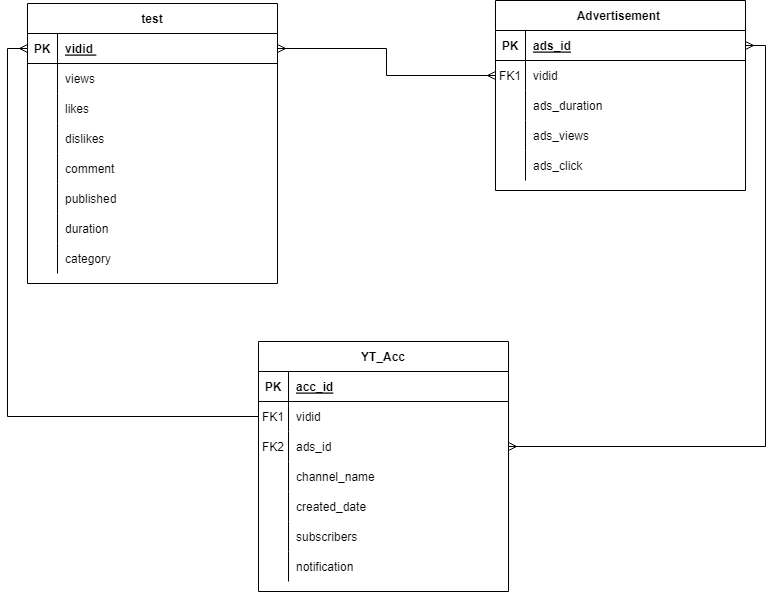

## Q7

 Develop three problem statements for the given dataset.

### Problem 1

Youtube content creator can monetize their channel by putting ads in their video. More ads view means more money generated from the video,  and more ads click gives more money on top of the ads view. For a content creator to have high income, they need to ensure that their videos can get as many ads view as they can and ads click is considered a bonus for them. Which video have the most ads view and ads click?

### Problem 2

Pewdiepie has one of the most subscribed YouTube channel and has generated millions from ads and interaction. The consistency of the channel to post videos has gained it a lot of subscribers. How many videos and subscribers does Pewdiepie have?

### Problem 3
Sometimes a video is what we need to procrastinate. Some people used a song in a video with the exact duration to time their activity, and there are also a group of people that used a long duration music category video to help them fall asleep. What is the video id with the longest duration of music category('F'), and what is the channel of the video?

## Q8

Write 3 different SQL statements to extract specific data from entity1, entity 2 and entity 3 to solve the problems designed in Question 7. (combine data from different tables)

#### Problem 1

Which video have the most ads view and which video has the most ads click?

%% sql
SELECT t.vidID as [Video ID] ,a.ads_views as [Ads Views]
FROM test as t
INNER JOIN Advertisement as a
ON t.vidID = a.vidID
WHERE a.ads_views = (SELECT MAX(ads_views) FROM a)

SELECT t.vidID as [Video ID] ,a.ads_clicks as [Ads Clicks]
FROM test as t
INNER JOIN Advertisement as a
ON t.vidID = a.vidID
WHERE a.ads_clicks = (SELECT MAX(ads_clicks) FROM a)

#### Problem 2
How many videos and subscribers does Pewdiepie have?

%%sql

SELECT y.channel_name as [Channel Name], DISTINCT COUNT(t.vidID) as [Number of Video]
FROM YT_Acc as y 
INNER JOIN test as t
ON y.vidID = t.vidID 
HAVING y.channel_name= 'Pewdiepie';

%%sql

SELECT channel_name as [Channel Name], subscribers as Subscribers
FROM YT_Acc
WHERE channel_name= 'Pewdiepie';

#### Problem 3

What is the video id with the longest duration of music category('F'), and what is the channel of the video?

%%sql

SELECT t.vidID as [Video ID], t.duration as Duration, t.category as Category, y.channel_name as [Channel Name]
FROM test as t
INNER JOIN YT_Acc as y 
ON t.vidID = y.vidID
WHERE duration = (SELECT MAX(t.duration) FROM test WHERE t.category = 'F');